In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#Create a dataframe beacuase its easier to visualize the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Append df, one more column "target"
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
#Do some exploritory analysis to see how many data~ 
# ~points have 1 in it
df[df.target==1].head()
#50-100 is versicolor, 100-150 is virginica, 0-50 is setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
#lets do some data visualization
from matplotlib import pyplot as plt

In [15]:
%matplotlib inline

In [16]:
# We want to seperate these three species into 3 seperate dataframes
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [19]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


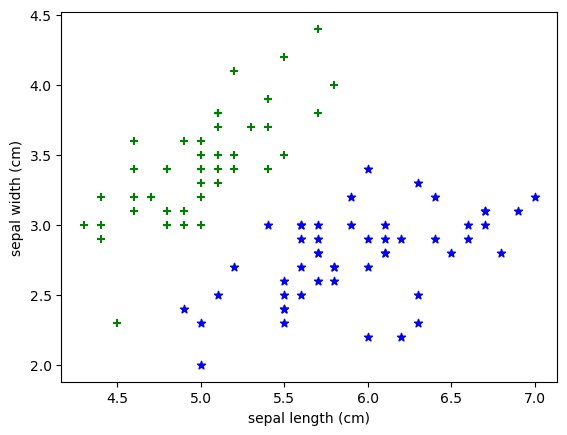

In [118]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue', marker='*')

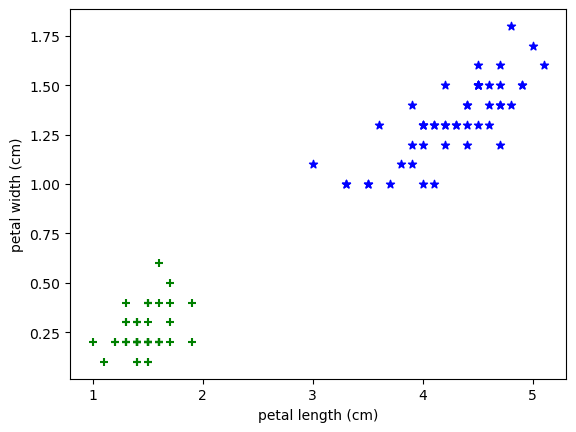

In [119]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', marker='*')

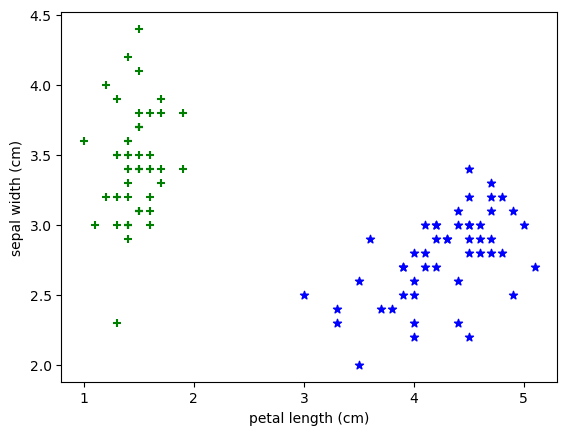

In [120]:
plt.xlabel('petal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['sepal width (cm)'],color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['sepal width (cm)'],color='blue', marker='*')

In [27]:
#Time to train our model
#First step split data 
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(['target','flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
y = df.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [34]:
len(X_train)

120

In [35]:
len(X_test)

30

In [101]:
from sklearn.svm import SVC
model = SVC()

In [102]:
# Time to train the model 
model.fit(X_train, y_train)

SVC()

In [103]:
print(model.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [104]:
model.score(X_test, y_test)

1.0

## The score wont change even with extreme parameter changes further evaluation is needed.

# 1. Hyperparameter Tuning using Grid Search with Cross-Validation

In [112]:
#The score wont change even with extreme parameter changes ~
# ~ further evaluation is needed.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Type of kernel
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.97


# 2. Model Evaluation with Additional Metrics

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 3. Cross-Validation

The cross-validation results you have provided indicate that you used a 5-fold cross-validation to evaluate your SVM model on the dataset. In 5-fold cross-validation, the data is divided into five subsets, and the model is trained five times, each time using four of the subsets as training data and the remaining one as the test set.

The high accuracy scores across all folds suggest that your SVM model is performing very well on this dataset. The variance in the scores is quite low (with the lowest being 93.33% and the highest being 100%), indicating that the model has good generalizability across different subsets of your data.

In [114]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(SVC(), X, y, cv=5)

# Cross-validation accuracy
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")


Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean cross-validation score: 0.9666666666666666


# 4. Regularization Parameter Check

In [115]:
# Set a high regularization parameter C
model = SVC(C=1e9)
model.fit(X_train, y_train)

# Check the score
print(model.score(X_test, y_test))


1.0


# 5. Overfitting Check

To check for overfitting, you can compare the performance on the training set and the test set:

If the training set score is perfect or near-perfect, and the test set score is significantly lower, it indicates overfitting.

In [117]:
# Score on the training set
print(f"Training set score: {model.score(X_train, y_train)}")

# Score on the test set
print(f"Test set score: {model.score(X_test, y_test)}")


Training set score: 1.0
Test set score: 1.0


## Exercise

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of you moddel using different kernels such as rbf and linear
2. Tune your model furth using regularization and gamma parameters and try to come up with highest accuracy score
3. Use 80% of smaples as training data size 